# HTML Scraping IMI project

This code is useful for scraping the data from the Innovative Medicine Initiative (IMI) webpage/HTML (http://www.imi.europa.eu/projects-results/project-factsheets) and the idea is to build a MySQL database in order to easily access and analyze the translational research topics from the different projects.

The first step reads the HTML from the projects website http://www.imi.europa.eu/projects-results/project-factsheets

In [1]:
#libraries used
install.packages('Rcrawler', repos='http://cran.us.r-project.org')
library(rvest)
library(Rcrawler)
library(stringr)

#stores the webpage url in factsheets variable
factsheets<-readLines("http://www.imi.europa.eu/projects-results/project-factsheets")
pattern_line="\t\t\t<a href=\"/projects-results/project-factsheets/"

#gets the line where is the project names
project = grep(pattern_line,factsheets,value=TRUE)

#formats and builds the url for each project, storing it in the project_url variable 
project<-gsub("\"|\\s|class.*","",project)
pattern_sub="<ahref=/"
project_url<-gsub(pattern_sub,"http://www.imi.europa.eu/", project)

package 'Rcrawler' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aathie\AppData\Local\Temp\Rtmpy8PTLS\downloaded_packages


Loading required package: xml2
Warning message:
"package 'Rcrawler' was built under R version 3.4.3"

Once obtained all the URLs for the different projects, the first thing to explore is the number of projects that we will be working with. (In this case 90). Also generate a wordcloud with the different company names. This will be furtherly improved.

package 'wordcloud' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aathie\AppData\Local\Temp\Rtmpy8PTLS\downloaded_packages


Warning message:
"package 'wordcloud' was built under R version 3.4.3"Loading required package: RColorBrewer


[1] "The number of projects registered so far is: 90"

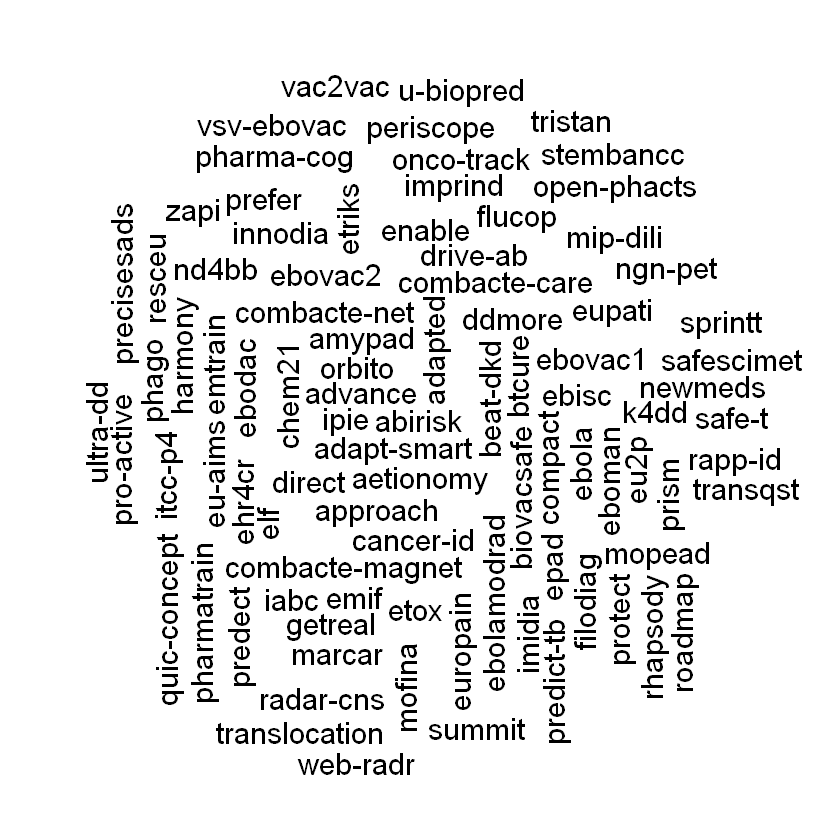

In [2]:
install.packages('wordcloud', repos='http://cran.us.r-project.org')
#install.packages('RColorBrewer', repos='http://cran.us.r-project.org') 

library(wordcloud)
library(RColorBrewer)

number_of_projects=length(project_url)
paste("The number of projects registered so far is:", number_of_projects)

#get the project names
pattern_sub='http://www.imi.europa.eu/projects-results/project-factsheets/'
all_project_names<-gsub(pattern_sub,"",project_url)

#build a data.frame to be used for wordcloud, this case the value for all is 1.
cloud_words<-data.frame(matrix(0, ncol = 2, nrow = 90))
colnames(cloud_words)<-c("company","value")
cloud_words[1]<-all_project_names
cloud_words[2]<-c(1)

wordcloud(words = cloud_words$company, freq = cloud_words$value, min.freq = 1, scale=c(1.5,.5), max.words=90, random.order=FALSE, rot.per=0.35)

In [3]:
#Lets obtain the data for the first project called 'ABIRISK'. 
#Later input variable project_url in a for loop and implement the function calle data_retrieval described below.
webpage = readLines('http://www.imi.europa.eu/projects-results/project-factsheets/direct')
write.table(webpage, file="webpage.txt")
getwd()

[1] "C:/Users/aathie/IMI"

Obtains the Title, Summary and two word abstract from the HTML stored in 'webpage' variable

In [4]:
library(stringr)

mypattern_title = '<meta name=\"title\" content' 
mypattern_summary = '<meta name=\"description\" content' 
mypattern_abstract = '<meta name=\"abstract\" content'

#Title
title = grep(mypattern_title, webpage, value=TRUE)
mypattern_remove_title = '<meta name="title" content="'
title1<-gsub(pattern = mypattern_remove_title,"", title)
title<-gsub('IMI - Innovative Medicines Initiative" />| \\|| " "',"", title1)
title<-gsub('â€™',"'",title)
title

#Summary
summary = grep(mypattern_summary,webpage,value=TRUE)
summary1<-gsub('<meta name="description" content="|" />', replacement="",summary)
summary1<-gsub('â€™',"'",summary1)
summary1

#Two word abstract
abstract = grep(mypattern_abstract,webpage,value=TRUE)
abstract<-gsub('<meta name="abstract" content="|" />', replacement="", abstract)
abstract<-gsub('â€™',"'",abstract)
abstract

[1] "DIRECT "

[1] "Diabetes treatment gets personal"

[1] "Diabetes research on patient stratification"

Obtains the start_date, end_date and class from the HTML stored in 'webpage' variable

In [5]:
mypattern_start_date = '<div class=\"field field--name-field-start-date field--type-datetime field--label-hidden field--item\">'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
mypattern_end_date = '<div class=\"field field--name-field-end-date field--type-datetime field--label-hidden field--item\">'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
mypattern_class = '<div class=\"field field--name-field-project-call field--type-entity-reference field--label-hidden field--item\">'                 

start_date = grep(mypattern_start_date, webpage, value=TRUE)
start_date<-gsub('<div class=\"field field--name-field-start-date field--type-datetime field--label-hidden field--item\"><time datetime=.*\"',"",start_date)
start_date<-gsub("</time>","",start_date, fixed=TRUE)
start_date<-gsub(">","",start_date, fixed=TRUE)
start_date<-gsub(" ","",start_date, fixed=TRUE)
start_date

end_date = grep(mypattern_end_date,webpage, value=TRUE)
end_date<-gsub('<div class=\"field field--name-field-end-date field--type-datetime field--label-hidden field--item\"><time datetime=.*\"',"",end_date)
end_date<-gsub("</time>","",end_date, fixed=TRUE)
end_date<-gsub(">","",end_date, fixed=TRUE)
end_date<-gsub(" ","",end_date, fixed=TRUE)
end_date

class= grep(mypattern_class,webpage, value=TRUE)
class<-gsub('<div class=\"field field--name-field-project-call field--type-entity-reference field--label-hidden field--item\">',"",class)
class<-gsub(pattern="Call","Call.",class)
class<-gsub(pattern="</div|\\s|>","",class)
class<-gsub(pattern="Call.","Call ",class)
class

[1] "01/02/2012"

[1] "31/01/2019"

[1] "IMI1-Call 3"

Obtain project contributions and separate them in the five categories, 1) Companies, 2) University, 3) Small and Medium enterprise (SMEs), 4) Patient organizations, 5) Thirdparties, stored in the variable webpage

In [84]:
mypattern_project_participants='<div class="project-participants info-box light-grey-bg"><div class="project-participants-category"><h5><strong>'
#project_participants = grep(mypattern_project_participants, webpage, value=TRUE)
#project_participants
#projects_participants_classification<-strsplit(project_participants, "<h5><strong>")
#projects_participants_classification
#x<-(unlist(projects_participants_classification))
#mypattern_separator = '<li class=\"text-capitalize\">'
#mypattern_separator
#a<-strsplit(projects_participants_classification[[1]][], mypattern_separator)
#a<-a[-1]
#mypattern_project_participants='<div class="project-participants info-box light-grey-bg"><div class="project-participants-category"><h5><strong>'

sep_efpia='<strong>EFPIA companies</strong>'
sep_university='<strong>Universities, research organisations, public bodies, non-profit groups</strong>'
sep_sme='<strong>Small and medium-sized enterprises (SMEs)</strong>'
sep_patient='<strong>Patient organisations</strong>'
sep_third='<strong>Third parties</strong>'

company_name<-list()
city<-list()
country<-list()

project_participants = grep(mypattern_project_participants, webpage, value=TRUE)

empty_m<-matrix(0, ncol = 3)
efpia_df<-empty_m
universities_df<-empty_m
smes_df<-empty_m
patient_df<-empty_m
third_parties_df<-empty_m

#project_participants

if(length(project_participants) != 0)
{
    projects_participants_classification<-strsplit(project_participants, '<h5><strong>')
    mypattern_separator = '<li class=\"text-capitalize\">'
    a<-strsplit(projects_participants_classification[[1]][], mypattern_separator)
    a<-a[-1]
    b<-lapply(a, gsub, pattern = "</li>|\"|>|</strong></h5><ul>|</ul>.*", replacement = "")

#Function to separate correctly the Participant City and Country
separate_participants<-function(x)
    {
    c=x
    c<-unlist(b[[i]][-1])
               for(j in 1:length(c))
               {
                     all<-(strsplit(c[j], ","))
                     all<-unlist(all)
                     company_name[[j]]<-all[1]
                     city[[j]]<-all[(length(all)-1)]
                     country[[j]]<-all[length(all)]
               }
    z<-cbind(company_name, city, country)
    return(z)
    }
#end of function
    
    
    for(i in 1:length(b))
       {
           if(b[[i]][1]=="EFPIA companies")
           {
               x=b[[i]][-1]
             #  print("pase")
               z<-separate_participants(x)
               efpia_df<-as.data.frame(z)
               colnames(efpia_df)<-c("NAME_efpia","CITY_efpia","COUNTRY_efpia")
            #   print(efpia_df)
           }
        
           if(b[[i]][1]=="Universities, research organisations, public bodies, non-profit groups")
           {
               x=b[[i]][-1]
             #  print("pase2")
               z<-separate_participants(x)   
               universities_df<-as.data.frame(z)
               colnames(universities_df)<-c("NAME_university","CITY_university","COUNTRY_university")
             #  print(universities_df)
           }
        
          if(b[[i]][1] == 'Small and medium-sized enterprises (SMEs)')
            {  
               x=b[[i]][-1]
               print("pase3")
               z<-separate_participants(x) 
               smes_df<-as.data.frame(z)
               colnames(smes_df)<-c("NAME_sme","CITY_sme","COUNTRY_sme")
               print(smes_df)
           }
        
          if(b[[i]][1] == 'Patient organisations')
            {  
               x=b[[i]][-1]
             #  print("pase4")
               z<-separate_participants(x)   
               patient_df<-as.data.frame(z)
               colnames(patient_df)<-c("NAME_patient","CITY_patient","COUNTRY_patient")
             #  print(patient_df)
           }
        
           if(b[[i]][1]=="Third parties")
           {
               x=b[[i]][-1]
            #   print("pase5")
               z<-separate_participants(x)  
               third_parties_df<-as.data.frame(z)
               colnames(third_parties_df)<-c("NAME_third","CITY_third","COUNTRY_third")
            #  print(third_parties_df)
           }
    }
}


[1] "pase"
                                      NAME_efpia        CITY_efpia
1        Boehringer Ingelheim International GmbH         Ingelheim
2                      Eli Lilly and Company Ltd       Basingstoke
3 Institut De Recherches Internationales Servier          Suresnes
4                               Novo Nordisk A/S         Bagsvaerd
5                Sanofi-Aventis Deutschland GMBH  Frankfurt / Main
    COUNTRY_efpia
1         Germany
2  United Kingdom
3          France
4         Denmark
5         Germany
[1] "pase2"
                                                      NAME_university
1           Academisch Ziekenhuis Leiden - Leids Universitair Centrum
2               Centre Hospitalier Regional et Universitaire de Lille
3                        Centre National De La Recherche Scientifique
4                                  Consiglio Nazionale delle Ricerche
5  Consorci Institut d'Investigacions BiomÃ¨diques August Pi i Sunyer
6                               Eberhard Karls 

NAME_efpia..Boehringer.Ingelheim.International.GmbH.,NAME_efpia..Eli.Lilly.and.Company.Ltd.,NAME_efpia..Institut.De.Recherches.Internationales.Servier.,NAME_efpia..Novo.Nordisk.A.S.,NAME_efpia..Sanofi.Aventis.Deutschland.GMBH.,CITY_efpia...Ingelheim.,CITY_efpia...Basingstoke.,CITY_efpia...Suresnes.,CITY_efpia...Bagsvaerd.,CITY_efpia...Frankfurt...Main.,...,X0.2,X0.3,X0.4,X0.5,NAME_third..Hospital.ClÃ.nic.i.Provincial.de.Barcelona.,NAME_third..UniversitÃ..Lille.2.Droit.et.SantÃ..,CITY_third...Barcelona.,CITY_third...Lille.,COUNTRY_third...Spain.,COUNTRY_third...France.
Boehringer Ingelheim International GmbH,Eli Lilly and Company Ltd,Institut De Recherches Internationales Servier,Novo Nordisk A/S,Sanofi-Aventis Deutschland GMBH,Ingelheim,Basingstoke,Suresnes,Bagsvaerd,Frankfurt / Main,...,0,0,0,0,Hospital ClÃ­nic i Provincial de Barcelona,UniversitÃ© Lille 2 Droit et SantÃ©,Barcelona,Lille,Spain,France


The previous code boxes are integrated in a function called 'data_retrieval'

In [93]:
data_retrieval<-function(x)
{
#webpage = readLines('http://www.imi.europa.eu/projects-results/project-factsheets/abirisk')
webpage<-readLines(x) #read the webpage html
    
        mypattern_title = '<meta name=\"title\" content' 
        mypattern_summary = '<meta name=\"description\" content' 
        mypattern_abstract = '<meta name=\"abstract\" content'
#--------------------Title summary two word abstract-------------------------------------------------
#Title
title = grep(mypattern_title, webpage, value=TRUE)
mypattern_remove_title = '<meta name="title" content="'
title1<-gsub(pattern = mypattern_remove_title, replacement = "", title)
title<-gsub('IMI - Innovative Medicines Initiative" />| \\|| " "', replacement = "", title1)

#Summary
summary = grep(mypattern_summary,webpage,value=TRUE)
summary<-gsub('<meta name="description" content="|" />', replacement="",summary)

#Two word abstract
abstract = grep(mypattern_abstract,webpage,value=TRUE)
abstract<-gsub('<meta name="abstract" content="|" />', replacement="", abstract)
abstract<-gsub("\t|\n|:|\\bfrom\\b |\\b-\\b |\\bfor\\b |\\ba\\b |\\band\\b | \\bto\\b |\\bor\\b| \\bthe\\b | \\bbut\\b |\\bAnd\\b| \\bThe\\b| \\bOr\\b| \\bBut\\b | \\bin\\b | \\bIn\\b | \\bon\\b| \\bOn\\b | \\bof\\b |\\bOf\\b"," ",abstract)
abstract<-gsub("(?<=[\\s])\\s*|^\\s+|\\s+$", "", abstract, perl=TRUE)
abstract<-list(unlist(strsplit(abstract, " ", fixed=TRUE)))

#----------------------start date end date class--------------------------------------------------
mypattern_start_date = '<div class=\"field field--name-field-start-date field--type-datetime field--label-hidden field--item\">'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
mypattern_end_date = '<div class=\"field field--name-field-end-date field--type-datetime field--label-hidden field--item\">'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
mypattern_class = '<div class=\"field field--name-field-project-call field--type-entity-reference field--label-hidden field--item\">'                 

#Start_date
start_date = grep(mypattern_start_date, webpage, value=TRUE)
start_date<-gsub('<div class=\"field field--name-field-start-date field--type-datetime field--label-hidden field--item\"><time datetime=.*\"',"",start_date)
start_date<-gsub("</time>","",start_date, fixed=TRUE)
start_date<-gsub(">","",start_date, fixed=TRUE)
start_date<-gsub(" ","",start_date, fixed=TRUE)

#End_date
end_date = grep(mypattern_end_date,webpage, value=TRUE)
end_date<-gsub('<div class=\"field field--name-field-end-date field--type-datetime field--label-hidden field--item\"><time datetime=.*\"',"",end_date)
end_date<-gsub("</time>","",end_date, fixed=TRUE)
end_date<-gsub(">","",end_date, fixed=TRUE)
end_date<-gsub(" ","",end_date, fixed=TRUE)

#Class
class= grep(mypattern_class,webpage, value=TRUE)
class<-gsub('<div class=\"field field--name-field-project-call field--type-entity-reference field--label-hidden field--item\">',"",class)
class<-gsub(pattern="Call","Call.",class)
class<-gsub(pattern="</div|\\s|>","",class)
class<-gsub(pattern="Call.","Call ",class)

#----------------------participants, city, country-----------------------------------------------
mypattern_project_participants='<div class="project-participants info-box light-grey-bg"><div class="project-participants-category"><h5><strong>'
project_participants = grep(mypattern_project_participants, webpage, value=TRUE)

empty_m<-matrix(0, ncol = 3)
efpia_df<-empty_m
universities_df<-empty_m
smes_df<-empty_m
patient_df<-empty_m
third_parties_df<-empty_m
    
separate_participants<-function(x)
    {
    c=x
    c<-unlist(b[[i]][-1])
               for(j in 1:length(c))
               {
                     all<-(strsplit(c[j], ","))
                     all<-unlist(all)
                     company_name[[j]]<-all[1]
                     city[[j]]<-all[(length(all)-1)]
                     country[[j]]<-all[length(all)]
               }
    z<-cbind(company_name, city, country)
    return(z)
    }

if(length(project_participants) != 0)
   {
    projects_participants_classification<-strsplit(project_participants, '<h5><strong>')
    mypattern_separator = '<li class=\"text-capitalize\">'
    a<-strsplit(projects_participants_classification[[1]][], mypattern_separator)
    a<-a[-1]
    b<-lapply(a, gsub, pattern = "</li>|\"|>|</strong></h5><ul>|</ul>.*", replacement = "")

    company_name<-list()
    city<-list()
    country<-list()
    
    for(i in 1:length(b))
       {
           if(b[[i]][1]=="EFPIA companies")
           {
               x=b[[i]][-1]
             #  print("pase")
               z<-separate_participants(x)
               efpia_df<-as.data.frame(z)
               colnames(efpia_df)<-c("NAME_efpia","CITY_efpia","COUNTRY_efpia")
            #   print(efpia_df)
           }
        
           if(b[[i]][1]=="Universities, research organisations, public bodies, non-profit groups")
           {
               x=b[[i]][-1]
             #  print("pase2")
               z<-separate_participants(x)   
               universities_df<-as.data.frame(z)
               colnames(universities_df)<-c("NAME_university","CITY_university","COUNTRY_university")
             #  print(universities_df)
           }
        
          if(b[[i]][1] == 'Small and medium-sized enterprises (SMEs)')
            {  
               x=b[[i]][-1]
              # print("pase3")
               z<-separate_participants(x) 
               smes_df<-as.data.frame(z)
               colnames(smes_df)<-c("NAME_sme","CITY_sme","COUNTRY_sme")
               #print(smes_df)
           }
        
          if(b[[i]][1] == 'Patient organisations')
            {  
               x=b[[i]][-1]
             #  print("pase4")
               z<-separate_participants(x)   
               patient_df<-as.data.frame(z)
               colnames(patient_df)<-c("NAME_patient","CITY_patient","COUNTRY_patient")
             #  print(patient_df)
           }
        
           if(b[[i]][1]=="Third parties")
           {
               x=b[[i]][-1]
            #   print("pase5")
               z<-separate_participants(x)  
               third_parties_df<-as.data.frame(z)
               colnames(third_parties_df)<-c("NAME_third","CITY_third","COUNTRY_third")
            #  print(third_parties_df)
           }
    }
    
   }
    
if(length(project_participants) == 0)
    {
        company_name<-list()
        city<-list()
        country<-list()
    
        company_name[[i]]<-c(0)
        city[[i]]<-c(0)
        country[[i]]<-c(0)
    }
#---------------------------------------------------------------------------------------------
full_data<-c(title, summary, abstract, start_date, end_date, class, efpia_df, universities_df, smes_df, patient_df, third_parties_df)
return(full_data)
} 
   

In [94]:
all_data<-list()
for(i in 1:number_of_projects)
{
    x=as.character(project_url[i])
    all_data[i]<-list(data_retrieval(x))
}

In [95]:
#Function taken from http://entrenchant.blogspot.com.es/2013/06/english-word-clouds-in-r.html
#to remove contractions
fix_contractions <- function(doc) {
   # "won't" is a special case as it does not expand to "wo not"
   doc <- gsub("won't", "will not", doc)
   doc <- gsub("n't", " not", doc)
   doc <- gsub("'ll", " will", doc)
   doc <- gsub("'re", " are", doc)
   doc <- gsub("'ve", " have", doc)
   doc <- gsub("'m", " am", doc)
   # 's could be is or possessive: it has no expansion
   doc <- gsub("'s", "", doc) 
   return(doc)
}

#Function taken from http://entrenchant.blogspot.com.es/2013/06/english-word-clouds-in-r.html
#to remove plurals
aggregate.plurals <- function (v) {
    aggr_fn <- function(v, singular, plural) {
       if (! is.na(v[plural])) {
           v[singular] <- v[singular] + v[plural]
           v <- v[-which(names(v) == plural)]
       }
       return(v)
    }
    for (n in names(v)) {
       n_pl <- paste(n, 's', sep='')
       v <- aggr_fn(v, n, n_pl)
       n_pl <- paste(n, 'es', sep='')
       v <- aggr_fn(v, n, n_pl)
     }
     return(v)
 }

In [97]:
install.packages('tm', repos='http://cran.us.r-project.org')
install.packages('treemap',repos='http://cran.us.r-project.org')
install.packages('pacman', repos='http://cran.us.r-project.org' ) 

library(tm) #text mining functions
library(treemap) #tree map graphs

#Function to collapse all the values into one text variable and cleaning up the text.
collapse_in_tv<-function(x,n)
{
    aux=c("")
    for(i in 1:length(x))
    {
        ngrams<-as.character(unlist(x[[i]][n]))
        ngrams2<-c(as.character(ngrams),as.character(aux), sep=" ")
        aux=ngrams2
    }
    together<-paste(aux,collapse=" ")

#Clean up the words, 1, all to lower case, removing numbers, removing stopword (and/or/but/etc.), remove punctuation marks
    corp <- Corpus(VectorSource(together))
    corp <- tm_map(corp, content_transformer(tolower))
    #corp <- tm_map(corp, removeNumbers) Some titles do have number, better not to remove them for the titles case
    corp <- tm_map(corp, removeWords, stopwords("english"))
#Remove contractions (this function was taken from: http://entrenchant.blogspot.com.es/2013/06/english-word-clouds-in-r.html)
    corp <- tm_map(corp, fix_contractions)
    corp <- tm_map(corp, removePunctuation)
    format_corp <- tm_map(corp, stripWhitespace)
#MISSING WHAT TO DO WITH THE PLURALS!!!!
    #format_corp <- aggregate.plurals(corp)
    
#Build the frequency matrix
    matrix_format <- TermDocumentMatrix(format_corp)
    m_format <- as.matrix(matrix_format)
    values <- sort(rowSums(m_format),decreasing=TRUE)

    format_df <- data.frame(word = names(values),freq=values)
    return(format_df)
}

also installing the dependency 'NLP'



package 'NLP' successfully unpacked and MD5 sums checked
package 'tm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aathie\AppData\Local\Temp\Rtmpy8PTLS\downloaded_packages


also installing the dependencies 'irlba', 'gridBase', 'igraph'



package 'irlba' successfully unpacked and MD5 sums checked
package 'gridBase' successfully unpacked and MD5 sums checked
package 'igraph' successfully unpacked and MD5 sums checked
package 'treemap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aathie\AppData\Local\Temp\Rtmpy8PTLS\downloaded_packages


also installing the dependencies 'memoise', 'whisker', 'rstudioapi', 'git2r', 'devtools'



package 'memoise' successfully unpacked and MD5 sums checked
package 'whisker' successfully unpacked and MD5 sums checked
package 'rstudioapi' successfully unpacked and MD5 sums checked
package 'git2r' successfully unpacked and MD5 sums checked
package 'devtools' successfully unpacked and MD5 sums checked
package 'pacman' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aathie\AppData\Local\Temp\Rtmpy8PTLS\downloaded_packages


Warning message:
"package 'tm' was built under R version 3.4.3"Loading required package: NLP
Warning message:
"package 'treemap' was built under R version 3.4.3"

In [98]:
#using the previous function (collapse_in_tv), build a data.frame with the words and the frequency for titles, summary and ngrams
words_title<-collapse_in_tv(all_data,1)
words_summary<-collapse_in_tv(all_data,2)
words_ngrams<-collapse_in_tv(all_data,3)

head(words_title)
head(words_summary)
head(words_ngrams)

,word,freq
abirisk,abirisk,1
adapted,adapted,1
adaptsmart,adaptsmart,1
advance,advance,1
aetionomy,aetionomy,1
amypad,amypad,1


,word,freq
project,project,80
will,will,78
new,new,77
development,development,55
patients,patients,51
drug,drug,43


,word,freq
development,development,15
drug,drug,12
european,european,12
disease,disease,8
vaccine,vaccine,8
research,research,7


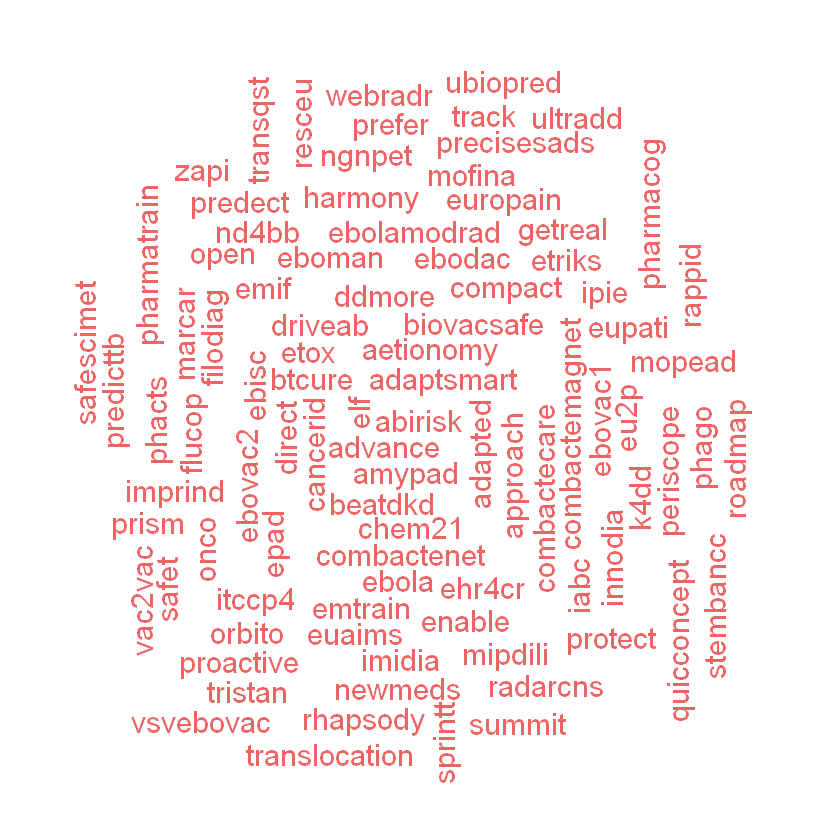

In [99]:
#visualize with wordcloud the titles, similar to the first wordcloud previously generated.
wordcloud(words = words_title$word, freq = words_title$freq, min.freq = 1, scale=c(1.5,.5), max.words=200, random.order=FALSE, rot.per=0.35, colors=c("indianred2"))

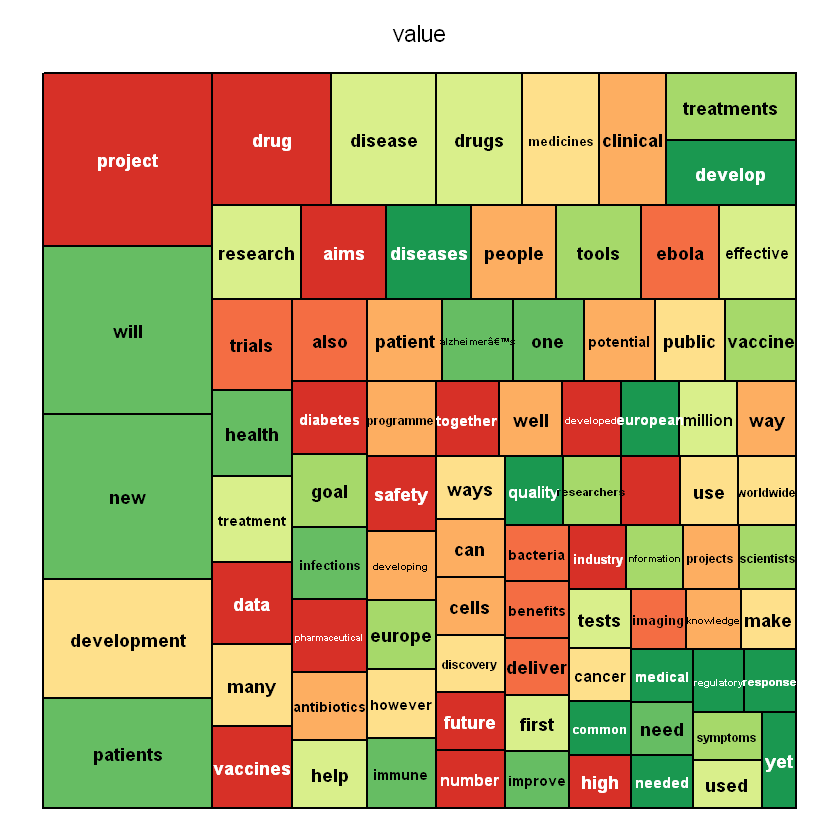

In [100]:
#Treemap using the words from the summary

group=(words_summary$word)
value=c(words_summary$freq)
data=data.frame(group,value)
data_filtered<-subset(data, data$value>8)

treemap(data_filtered, index="group", vSize="value", vColor="value", type="index", palette= brewer.pal(n=8, "RdYlGn"))

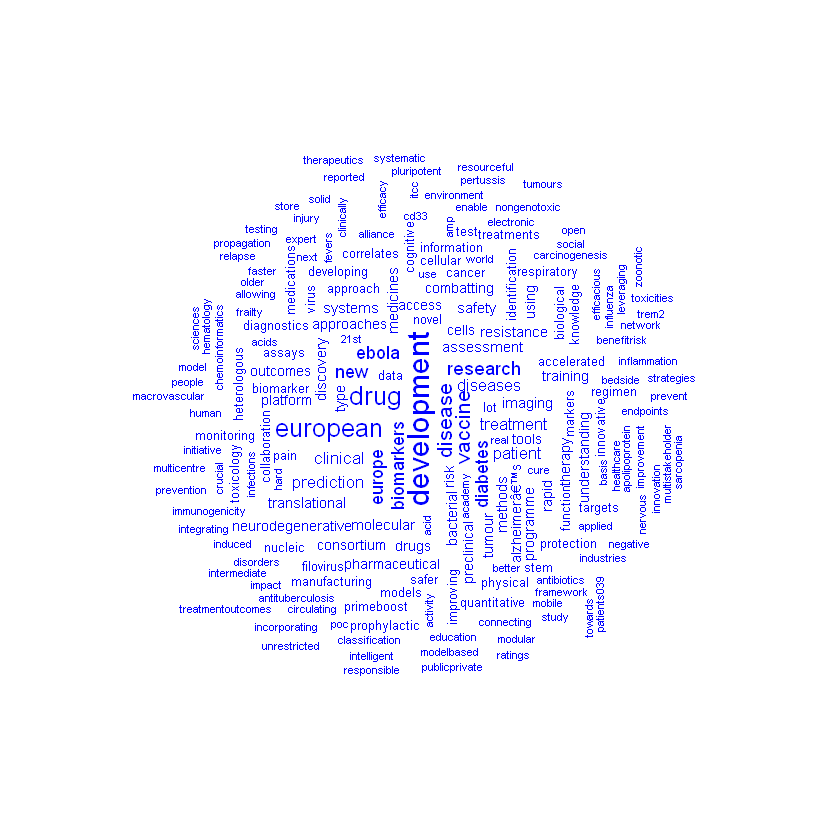

In [69]:
#Wordcloud using the words from the summary
wordcloud(words = words_ngrams$word, freq = words_ngrams$freq, min.freq = 1, scale=c(1.5,.5), max.words=200, random.order=FALSE, rot.per=0.35, colors=c("blue"))

In [91]:
merge_in_one_variable<-function(x,n)
{
together<-c()
for(i in 1:length(x))
    {
        ngrams<-(x[[i]][n])
        together<-c(unlist(ngrams),together)
    }
    
#Build the frequency matrix
   # matrix_format <- TermDocumentMatrix(format_corp)
   # m_format <- as.matrix(matrix_format)
    #values <- sort(rowSums(m_format),decreasing=TRUE)

  #  format_df <- data.frame(word = names(values),freq=values)
    return(together)
}

In [102]:
#participants<-merge_in_one_variable(all_data,"$COUNTRY_efpia")

remove_strange_symbols<-function(x)
    {
        x<-gsub("Ã©","è",x)
        x<-gsub("Ã¨","é",x)
        x<-gsub("Ã¸","ø",x)
        x<-gsub("Ã¤","ä",x)
        x<-gsub("Ã","à",x)
        x<-gsub("Ã´","ô",x)
        x<-gsub("Ãª","ê",x)
        x<-gsub("à¶","ö",x)
        x<-gsub("à¼","ü",x)
        x<-gsub("à³","ó",x)
        x<-gsub("à±","ñ",x)
    return(x)
    }


In [128]:
together<-c()
for(i in 1:length(all_data))
    {     
        efpia_countries<-all_data[[i]]$NAME_sme
        together<-c(unlist(efpia_countries),together)
    }

participants<-remove_strange_symbols(together)
participants_for_treemap<-as.data.frame(sort(table(participants)))

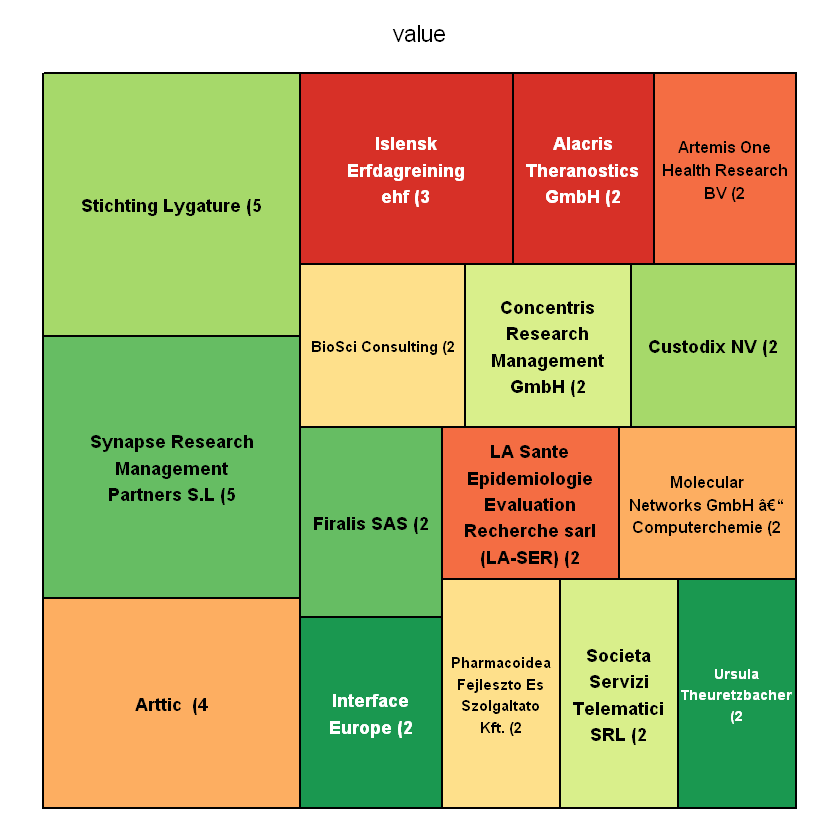

In [132]:
#barplot(sort(table(participants)))

group=(participants_for_treemap$participants)
value=c(participants_for_treemap$Freq)

data=data.frame(group,value)
data_filtered<-subset(data, data$value>1)
data_filtered$label <-paste(data_filtered$group, data_filtered$value, sep = " (")

treemap(data_filtered, index=c("label"), vSize="value", vColor="value", type="index", palette= brewer.pal(n=8, "RdYlGn"))